## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9973616	total: 58.8ms	remaining: 58.7s
1:	learn: 0.9794651	total: 59.8ms	remaining: 29.8s
2:	learn: 0.9585421	total: 60.8ms	remaining: 20.2s
3:	learn: 0.9420513	total: 61.9ms	remaining: 15.4s
4:	learn: 0.9232279	total: 62.8ms	remaining: 12.5s
5:	learn: 0.9073441	total: 63.9ms	remaining: 10.6s
6:	learn: 0.8918107	total: 64.9ms	remaining: 9.21s
7:	learn: 0.8757572	total: 65.8ms	remaining: 8.16s
8:	learn: 0.8610759	total: 66.7ms	remaining: 7.34s
9:	learn: 0.8449822	total: 67.7ms	remaining: 6.7s
10:	learn: 0.8297139	total: 68.5ms	remaining: 6.16s
11:	learn: 0.8161788	total: 69.4ms	remaining: 5.71s
12:	learn: 0.8013808	total: 70.2ms	remaining: 5.33s
13:	learn: 0.7863743	total: 71.4ms	remaining: 5.03s
14:	learn: 0.7729546	total: 72.3ms	remaining: 4.75s
15:	learn: 0.7597386	total: 73ms	remaining: 4.49s
16:	learn: 0.7446542	total: 73.9ms	remaining: 4.28s
17:	learn: 0.7314535	total: 74.8ms	remaining: 4.08s
18:	learn: 0.7189380	total: 75.6ms	remaining: 3

60:	learn: 0.4193026	total: 108ms	remaining: 1.67s
61:	learn: 0.4145173	total: 109ms	remaining: 1.65s
62:	learn: 0.4121158	total: 110ms	remaining: 1.63s
63:	learn: 0.4077712	total: 111ms	remaining: 1.62s
64:	learn: 0.4038136	total: 112ms	remaining: 1.6s
65:	learn: 0.4002117	total: 112ms	remaining: 1.59s
66:	learn: 0.3964294	total: 113ms	remaining: 1.58s
67:	learn: 0.3924968	total: 114ms	remaining: 1.56s
68:	learn: 0.3896761	total: 115ms	remaining: 1.55s
69:	learn: 0.3869201	total: 116ms	remaining: 1.54s
70:	learn: 0.3840993	total: 116ms	remaining: 1.52s
71:	learn: 0.3816118	total: 117ms	remaining: 1.51s
72:	learn: 0.3792409	total: 118ms	remaining: 1.5s
73:	learn: 0.3763460	total: 119ms	remaining: 1.49s
74:	learn: 0.3730855	total: 120ms	remaining: 1.48s
75:	learn: 0.3698659	total: 120ms	remaining: 1.46s
76:	learn: 0.3663121	total: 121ms	remaining: 1.45s
77:	learn: 0.3627353	total: 122ms	remaining: 1.44s
78:	learn: 0.3608139	total: 123ms	remaining: 1.43s
79:	learn: 0.3586321	total: 124ms

156:	learn: 0.2496903	total: 192ms	remaining: 1.03s
157:	learn: 0.2484073	total: 192ms	remaining: 1.02s
158:	learn: 0.2474021	total: 193ms	remaining: 1.02s
159:	learn: 0.2466202	total: 194ms	remaining: 1.02s
160:	learn: 0.2456384	total: 195ms	remaining: 1.01s
161:	learn: 0.2445160	total: 196ms	remaining: 1.01s
162:	learn: 0.2439368	total: 197ms	remaining: 1.01s
163:	learn: 0.2432231	total: 198ms	remaining: 1.01s
164:	learn: 0.2425151	total: 199ms	remaining: 1s
165:	learn: 0.2419510	total: 199ms	remaining: 1s
166:	learn: 0.2414670	total: 200ms	remaining: 999ms
167:	learn: 0.2408070	total: 201ms	remaining: 996ms
168:	learn: 0.2400190	total: 202ms	remaining: 993ms
169:	learn: 0.2391275	total: 203ms	remaining: 990ms
170:	learn: 0.2383677	total: 204ms	remaining: 987ms
171:	learn: 0.2377682	total: 204ms	remaining: 984ms
172:	learn: 0.2368107	total: 205ms	remaining: 981ms
173:	learn: 0.2359848	total: 206ms	remaining: 978ms
174:	learn: 0.2352314	total: 207ms	remaining: 975ms
175:	learn: 0.2347

285:	learn: 0.1806739	total: 298ms	remaining: 745ms
286:	learn: 0.1803631	total: 300ms	remaining: 744ms
287:	learn: 0.1802724	total: 300ms	remaining: 743ms
288:	learn: 0.1798053	total: 301ms	remaining: 742ms
289:	learn: 0.1793784	total: 302ms	remaining: 740ms
290:	learn: 0.1791067	total: 303ms	remaining: 739ms
291:	learn: 0.1786421	total: 304ms	remaining: 737ms
292:	learn: 0.1782427	total: 305ms	remaining: 736ms
293:	learn: 0.1778402	total: 306ms	remaining: 734ms
294:	learn: 0.1776362	total: 307ms	remaining: 733ms
295:	learn: 0.1774760	total: 307ms	remaining: 731ms
296:	learn: 0.1772303	total: 308ms	remaining: 730ms
297:	learn: 0.1765781	total: 309ms	remaining: 728ms
298:	learn: 0.1763022	total: 310ms	remaining: 727ms
299:	learn: 0.1759332	total: 311ms	remaining: 725ms
300:	learn: 0.1755503	total: 311ms	remaining: 723ms
301:	learn: 0.1752162	total: 312ms	remaining: 722ms
302:	learn: 0.1748864	total: 313ms	remaining: 720ms
303:	learn: 0.1745675	total: 314ms	remaining: 718ms
304:	learn: 

379:	learn: 0.1520054	total: 382ms	remaining: 623ms
380:	learn: 0.1515455	total: 383ms	remaining: 623ms
381:	learn: 0.1513286	total: 384ms	remaining: 622ms
382:	learn: 0.1510312	total: 385ms	remaining: 621ms
383:	learn: 0.1505748	total: 386ms	remaining: 620ms
384:	learn: 0.1503630	total: 387ms	remaining: 619ms
385:	learn: 0.1501988	total: 388ms	remaining: 618ms
386:	learn: 0.1500446	total: 390ms	remaining: 618ms
387:	learn: 0.1498028	total: 392ms	remaining: 618ms
388:	learn: 0.1494744	total: 393ms	remaining: 618ms
389:	learn: 0.1493280	total: 395ms	remaining: 617ms
390:	learn: 0.1490525	total: 396ms	remaining: 616ms
391:	learn: 0.1488488	total: 396ms	remaining: 615ms
392:	learn: 0.1484776	total: 397ms	remaining: 614ms
393:	learn: 0.1483285	total: 398ms	remaining: 612ms
394:	learn: 0.1479035	total: 399ms	remaining: 611ms
395:	learn: 0.1476512	total: 400ms	remaining: 610ms
396:	learn: 0.1474643	total: 401ms	remaining: 608ms
397:	learn: 0.1471076	total: 401ms	remaining: 607ms
398:	learn: 

500:	learn: 0.1244223	total: 488ms	remaining: 486ms
501:	learn: 0.1243884	total: 489ms	remaining: 485ms
502:	learn: 0.1241588	total: 490ms	remaining: 484ms
503:	learn: 0.1238839	total: 491ms	remaining: 483ms
504:	learn: 0.1238639	total: 492ms	remaining: 482ms
505:	learn: 0.1235263	total: 492ms	remaining: 481ms
506:	learn: 0.1233342	total: 493ms	remaining: 480ms
507:	learn: 0.1231585	total: 495ms	remaining: 479ms
508:	learn: 0.1229680	total: 496ms	remaining: 478ms
509:	learn: 0.1228640	total: 497ms	remaining: 477ms
510:	learn: 0.1225881	total: 498ms	remaining: 477ms
511:	learn: 0.1225739	total: 499ms	remaining: 476ms
512:	learn: 0.1224520	total: 500ms	remaining: 475ms
513:	learn: 0.1221645	total: 501ms	remaining: 474ms
514:	learn: 0.1221469	total: 502ms	remaining: 473ms
515:	learn: 0.1218471	total: 503ms	remaining: 472ms
516:	learn: 0.1218230	total: 504ms	remaining: 471ms
517:	learn: 0.1216940	total: 505ms	remaining: 470ms
518:	learn: 0.1215892	total: 506ms	remaining: 469ms
519:	learn: 

570:	learn: 0.1123591	total: 570ms	remaining: 428ms
571:	learn: 0.1122978	total: 571ms	remaining: 427ms
572:	learn: 0.1122165	total: 572ms	remaining: 426ms
573:	learn: 0.1120405	total: 573ms	remaining: 425ms
574:	learn: 0.1120190	total: 574ms	remaining: 424ms
575:	learn: 0.1117945	total: 575ms	remaining: 423ms
576:	learn: 0.1116507	total: 576ms	remaining: 422ms
577:	learn: 0.1115836	total: 576ms	remaining: 421ms
578:	learn: 0.1114106	total: 577ms	remaining: 420ms
579:	learn: 0.1112363	total: 578ms	remaining: 419ms
580:	learn: 0.1109728	total: 579ms	remaining: 417ms
581:	learn: 0.1109576	total: 580ms	remaining: 416ms
582:	learn: 0.1107944	total: 580ms	remaining: 415ms
583:	learn: 0.1106308	total: 581ms	remaining: 414ms
584:	learn: 0.1103772	total: 582ms	remaining: 413ms
585:	learn: 0.1102091	total: 583ms	remaining: 412ms
586:	learn: 0.1101789	total: 584ms	remaining: 411ms
587:	learn: 0.1100056	total: 585ms	remaining: 410ms
588:	learn: 0.1097924	total: 586ms	remaining: 409ms
589:	learn: 

697:	learn: 0.0929760	total: 677ms	remaining: 293ms
698:	learn: 0.0928251	total: 678ms	remaining: 292ms
699:	learn: 0.0926657	total: 679ms	remaining: 291ms
700:	learn: 0.0924836	total: 680ms	remaining: 290ms
701:	learn: 0.0923518	total: 681ms	remaining: 289ms
702:	learn: 0.0921483	total: 682ms	remaining: 288ms
703:	learn: 0.0920340	total: 683ms	remaining: 287ms
704:	learn: 0.0918150	total: 684ms	remaining: 286ms
705:	learn: 0.0916541	total: 684ms	remaining: 285ms
706:	learn: 0.0914978	total: 685ms	remaining: 284ms
707:	learn: 0.0914128	total: 686ms	remaining: 283ms
708:	learn: 0.0912100	total: 687ms	remaining: 282ms
709:	learn: 0.0909778	total: 688ms	remaining: 281ms
710:	learn: 0.0908351	total: 688ms	remaining: 280ms
711:	learn: 0.0908190	total: 689ms	remaining: 279ms
712:	learn: 0.0905981	total: 690ms	remaining: 278ms
713:	learn: 0.0904144	total: 691ms	remaining: 277ms
714:	learn: 0.0901858	total: 692ms	remaining: 276ms
715:	learn: 0.0900933	total: 693ms	remaining: 275ms
716:	learn: 

798:	learn: 0.0793184	total: 761ms	remaining: 191ms
799:	learn: 0.0791772	total: 762ms	remaining: 190ms
800:	learn: 0.0790277	total: 762ms	remaining: 189ms
801:	learn: 0.0790138	total: 763ms	remaining: 188ms
802:	learn: 0.0788719	total: 765ms	remaining: 188ms
803:	learn: 0.0786605	total: 765ms	remaining: 187ms
804:	learn: 0.0785331	total: 766ms	remaining: 186ms
805:	learn: 0.0784281	total: 767ms	remaining: 185ms
806:	learn: 0.0782867	total: 768ms	remaining: 184ms
807:	learn: 0.0781455	total: 769ms	remaining: 183ms
808:	learn: 0.0780043	total: 770ms	remaining: 182ms
809:	learn: 0.0779849	total: 771ms	remaining: 181ms
810:	learn: 0.0779221	total: 771ms	remaining: 180ms
811:	learn: 0.0778324	total: 772ms	remaining: 179ms
812:	learn: 0.0776999	total: 773ms	remaining: 178ms
813:	learn: 0.0775285	total: 774ms	remaining: 177ms
814:	learn: 0.0774291	total: 774ms	remaining: 176ms
815:	learn: 0.0772891	total: 775ms	remaining: 175ms
816:	learn: 0.0772386	total: 776ms	remaining: 174ms
817:	learn: 

929:	learn: 0.0654507	total: 868ms	remaining: 65.3ms
930:	learn: 0.0654172	total: 869ms	remaining: 64.4ms
931:	learn: 0.0653633	total: 870ms	remaining: 63.5ms
932:	learn: 0.0652880	total: 871ms	remaining: 62.5ms
933:	learn: 0.0651967	total: 871ms	remaining: 61.6ms
934:	learn: 0.0650850	total: 872ms	remaining: 60.6ms
935:	learn: 0.0650770	total: 873ms	remaining: 59.7ms
936:	learn: 0.0649513	total: 874ms	remaining: 58.8ms
937:	learn: 0.0648926	total: 875ms	remaining: 57.8ms
938:	learn: 0.0648269	total: 875ms	remaining: 56.9ms
939:	learn: 0.0647261	total: 876ms	remaining: 55.9ms
940:	learn: 0.0646398	total: 877ms	remaining: 55ms
941:	learn: 0.0645682	total: 878ms	remaining: 54.1ms
942:	learn: 0.0644564	total: 879ms	remaining: 53.1ms
943:	learn: 0.0643396	total: 880ms	remaining: 52.2ms
944:	learn: 0.0642550	total: 881ms	remaining: 51.3ms
945:	learn: 0.0642395	total: 882ms	remaining: 50.3ms
946:	learn: 0.0642349	total: 883ms	remaining: 49.4ms
947:	learn: 0.0641457	total: 883ms	remaining: 48

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

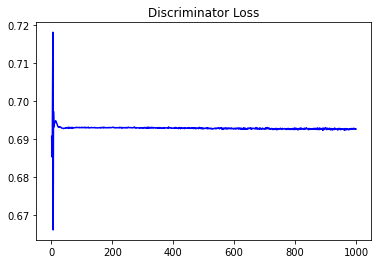

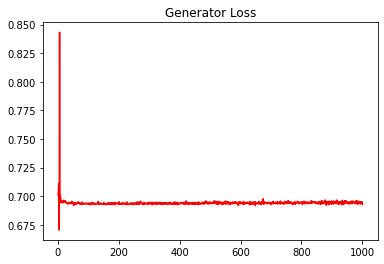

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1008328573921745


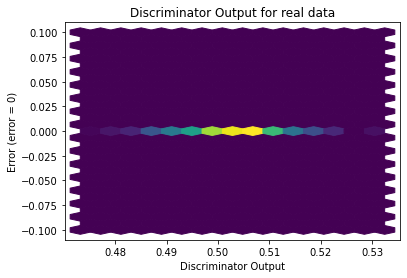

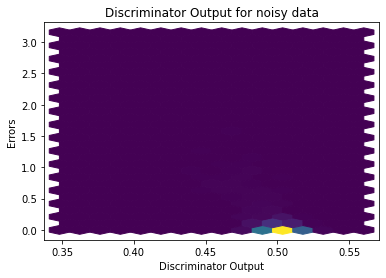

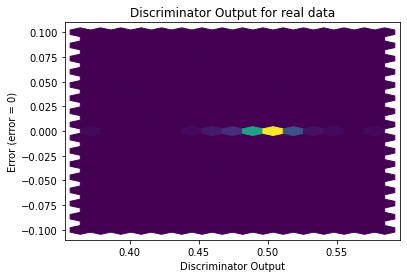

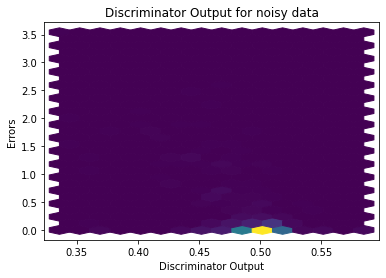

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


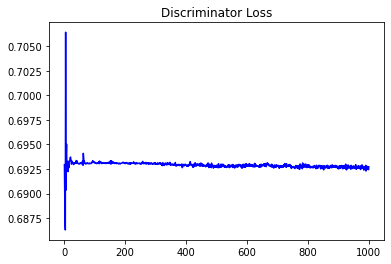

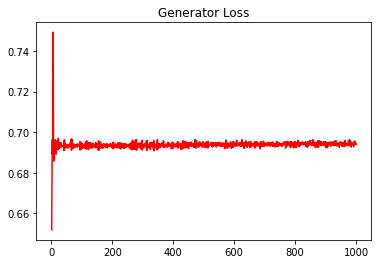

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.10140859627546989


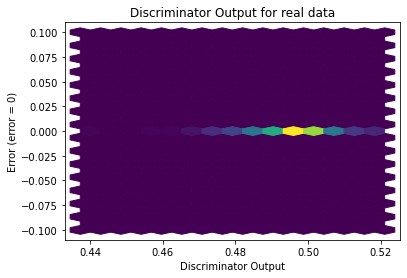

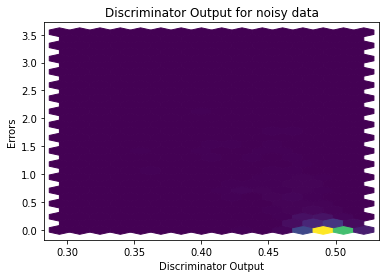

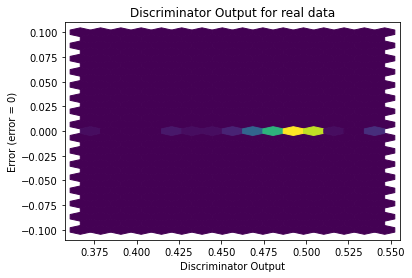

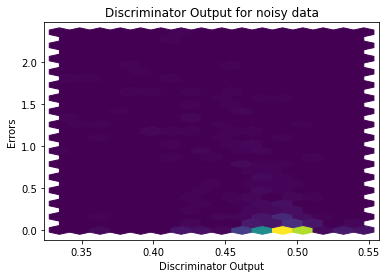

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3968]], requires_grad=True)
